# BANK LOAN ANALYSIS REPORT

## Import Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from matplotlib.patches import Circle

In [8]:
df = pd.read_excel("financial_loan.xlsx")

In [10]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


## Metadata of file

In [11]:
print("No of Rows:", df.shape[0])

No of Rows: 38576


In [12]:
print("No of Columns:", df.shape[1])

No of Columns: 24


In [13]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

## Data Types

In [14]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [15]:
df.describe

<bound method NDFrame.describe of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat

In [16]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Total loan Application

In [18]:
total_loan_application = df['id'].count()
print("Total Loan Application:", total_loan_application)

Total Loan Application: 38576


### MTD Total loan Application

In [22]:
latest_issue_date = df['issue_date'].max()
latest_month = latest_issue_date.month
latest_year = latest_issue_date.year

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_data

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
13,1020855,CA,INDIVIDUAL,5 years,henkel corporation,B,RENT,2021-12-11,2021-12-14,2021-12-14,...,B5,36 months,Not Verified,48000.0,0.1533,268.36,0.1269,8000,15,9661
15,1060995,RI,INDIVIDUAL,< 1 year,HSA-UWC,B,RENT,2021-12-11,2021-02-14,2021-10-13,...,B4,36 months,Source Verified,60000.0,0.0630,400.99,0.1242,12000,14,9547
16,1046507,TX,INDIVIDUAL,1 year,Child's Day,B,RENT,2021-12-02,2021-04-16,2021-12-14,...,B1,36 months,Verified,16800.0,0.0350,98.29,0.0991,3050,8,3538
18,1059497,FL,INDIVIDUAL,10+ years,Sandestin Beach Hilton,B,MORTGAGE,2021-12-12,2021-12-14,2021-12-14,...,B2,36 months,Verified,35000.0,0.1392,162.87,0.1065,5000,23,5863
42,472634,FL,INDIVIDUAL,1 year,walmart,A,RENT,2021-12-09,2021-04-11,2021-11-10,...,A1,36 months,Not Verified,12720.0,0.0000,231.75,0.0705,7500,9,2073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38496,1026558,CA,INDIVIDUAL,4 years,"ACCES I/O Products, Inc.",B,MORTGAGE,2021-12-11,2021-10-14,2021-09-14,...,B4,60 months,Verified,54600.0,0.1209,561.44,0.1242,25000,19,31693
38516,633392,CT,INDIVIDUAL,10+ years,CVS Pharmacy,B,OWN,2021-12-10,2021-12-15,2021-01-16,...,B5,60 months,Verified,40000.0,0.0885,149.98,0.1036,7000,21,8998
38531,1052169,NY,INDIVIDUAL,1 year,Binder and Binder,C,RENT,2021-12-11,2021-01-12,2021-01-12,...,C1,60 months,Verified,50000.0,0.1922,460.10,0.1349,20000,39,20226
38535,624384,MA,INDIVIDUAL,4 years,"CH Newton Builders, Inc",C,RENT,2021-12-10,2021-05-16,2021-04-15,...,C4,60 months,Verified,43160.0,0.0189,229.33,0.1335,10000,5,13490


In [29]:
mtd_loan_applications = mtd_data['id'].count()
print(f"MTD Loan Application for {latest_issue_date.strftime('%B %Y')} : {mtd_loan_applications}")

MTD Loan Application for December 2021 : 4314


### Total funded amount

In [30]:
total_funded_amount = df['loan_amount'].sum()
print("Total Funded Amount: ", total_funded_amount)

Total Funded Amount:  435757075


In [36]:
total_funded_amount_formated = total_funded_amount/1000000
print("Total Funded Amount (in millions of dollars): ${:.2f}M".format(total_funded_amount_formated))

Total Funded Amount (in millions of dollars): $435.76M


### MTD funded amount

In [62]:
mtd_funded_amount = mtd_data['loan_amount'].sum()
mtd_funded_amount_formated = mtd_funded_amount/1000000
print("MTD Funded Amount : ${:.2f}M".format(mtd_funded_amount_formated))

MTD Funded Amount : $53.98M


### Total Amount Received

In [65]:
total_received_amount = df['total_payment'].sum()
total_received_amount_formated = total_received_amount/1000000
print("Total Received Amount : ${:.2f}M".format(total_received_amount_formated))

Total Received Amount : $473.07M


### MTD Amount Received

In [66]:
mtd_received_amount = mtd_data['total_payment'].sum()
mtd_recived_amount_formated = mtd_received_amount/1000000
print("MTD Received Amount : ${:.2f}M".format(mtd_recived_amount_formated))

MTD Received Amount : $58.07M


### Avg Interest Rate

In [74]:
avg_interest_rate = df['int_rate'].mean()
avg_interest_rate_percent = avg_interest_rate * 100
print("Average Interest Rate: {:.2f}%".format(avg_interest_rate_percent))

Average Interest Rate: 12.05%


### Avg debt to income ratio (DTI)

In [76]:
avg_dti = df['dti'].mean()
avg_dti_percent = avg_dti * 100
print("Average DTI: {:.2f}%".format(avg_dti_percent))

Average DTI: 13.33%


### Good Loan Metrics

In [82]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]
total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_formated = good_loan_funded_amount/1000000
good_loan_received_formated = good_loan_received/1000000

good_loan_percentage = (good_loan_applications/total_loan_applications) * 100

print("Number of Good Loan Applications : {:,}".format(good_loan_applications))
print("Good Loan Funded Amount (in millions) : ${:.2f}M".format(good_loan_funded_amount_formated))
print("Good Loan Received Amount (in millions) : ${:.2f}M".format(good_loan_received_formated))
print("Percentage of Good Loans : {:.2f}% ".format(good_loan_percentage))

Number of Good Loan Applications : 33,243
Good Loan Funded Amount (in millions) : $370.22M
Good Loan Received Amount (in millions) : $435.79M
Percentage of Good Loans : 86.18% 


### Bad Loan Metrics

In [86]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]
total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount =bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_formated = bad_loan_funded_amount/1000000
bad_loan_received_formated = bad_loan_received/1000000
bad_laon_loss = (bad_loan_funded_amount - bad_loan_received)/1000000

bad_loan_percentage = (bad_loan_applications/total_loan_applications) * 100

print("Number of Bad Loan Applications : {:,}".format(bad_loan_applications))
print("Bad Loan Funded Amount (in millions) : ${:.2f}M".format(bad_loan_funded_amount_formated))
print("Bad Loan Received Amount (in millions) : ${:.2f}M".format(bad_loan_received_formated))
print("Percentage of Bad Loans : {:.2f}% ".format(bad_loan_percentage))
print("Amount Lost on Bad Loan (in millions) : ${:.2f}M".format(bad_laon_loss))

Number of Bad Loan Applications : 5,333
Bad Loan Funded Amount (in millions) : $65.53M
Bad Loan Received Amount (in millions) : $37.28M
Percentage of Bad Loans : 13.82% 
Amount Lost on Bad Loan (in millions) : $28.25M


### Monthly Trends by Issue Date for Total Amount Funded

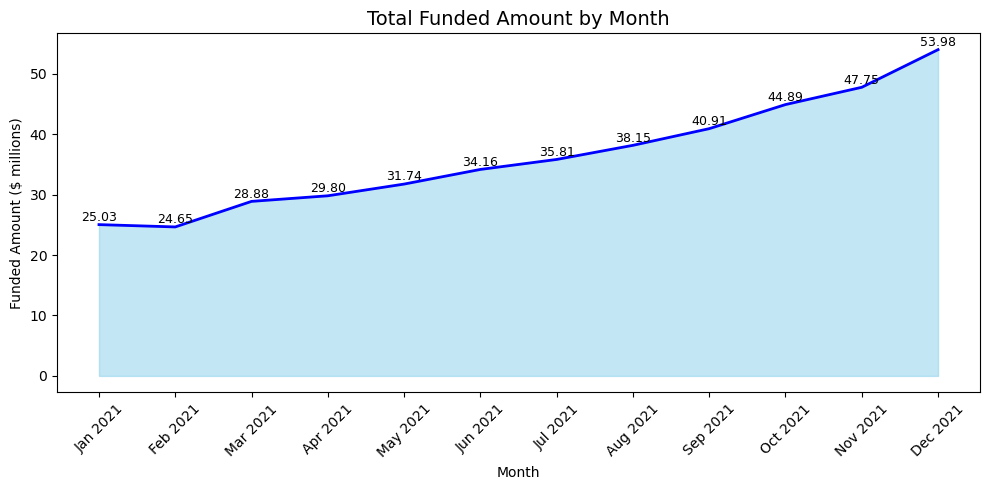

In [108]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name = lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name='loan_amount_millions')
)
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
            ha='center', va="bottom", fontsize=9, rotation=0, color='black')
    
plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date for Total Amount Funded

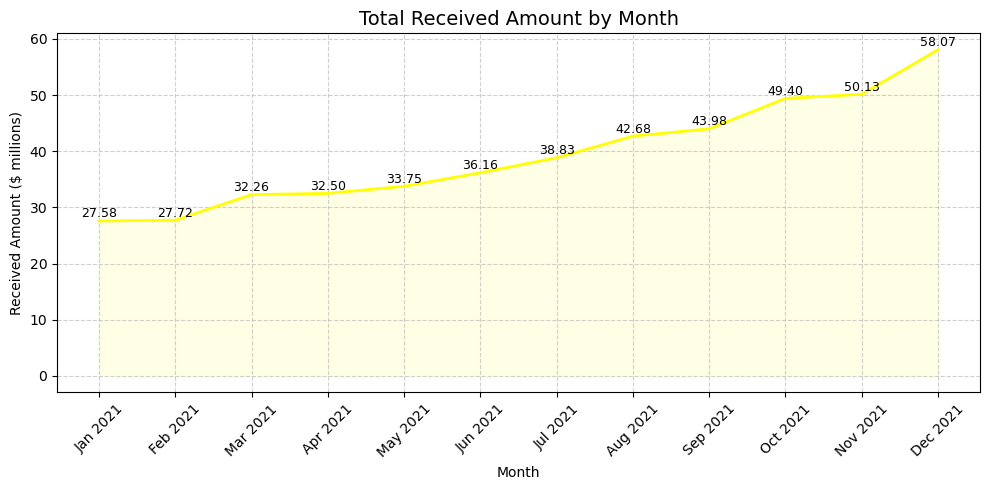

In [114]:
monthly_received = (
    df.sort_values('issue_date')
    .assign(month_name = lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name='loan_received_millions')
)
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'], monthly_received['loan_received_millions'], color='lightyellow', alpha=0.8)
plt.plot(monthly_funded['month_name'], monthly_received['loan_received_millions'], color='yellow', linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i, row['loan_received_millions'] + 0.1, f"{row['loan_received_millions']:.2f}",
            ha='center', va="bottom", fontsize=9, rotation=0, color='black')
    
plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trend Analysis for Total loan applications

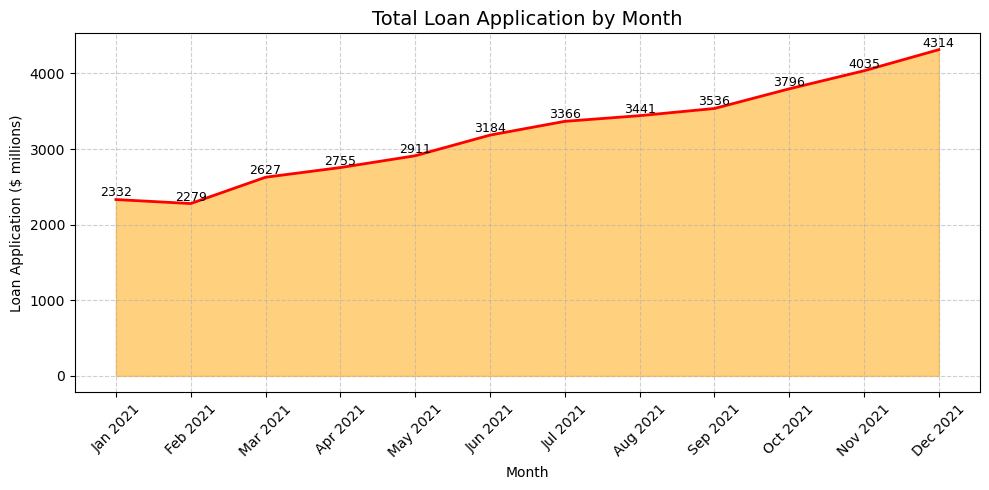

In [119]:
monthly_applications = (
    df.sort_values('issue_date')
    .assign(month_name = lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name='loan_application_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_application_count'], color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_application_count'], color='red', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_application_count'] + 0.5, f"{row['loan_application_count']}",
            ha='center', va="bottom", fontsize=9, rotation=0, color='black')
    
plt.title('Total Loan Application by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Loan Application ($ millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis by State for Total Funded Amount (Bar Chart)

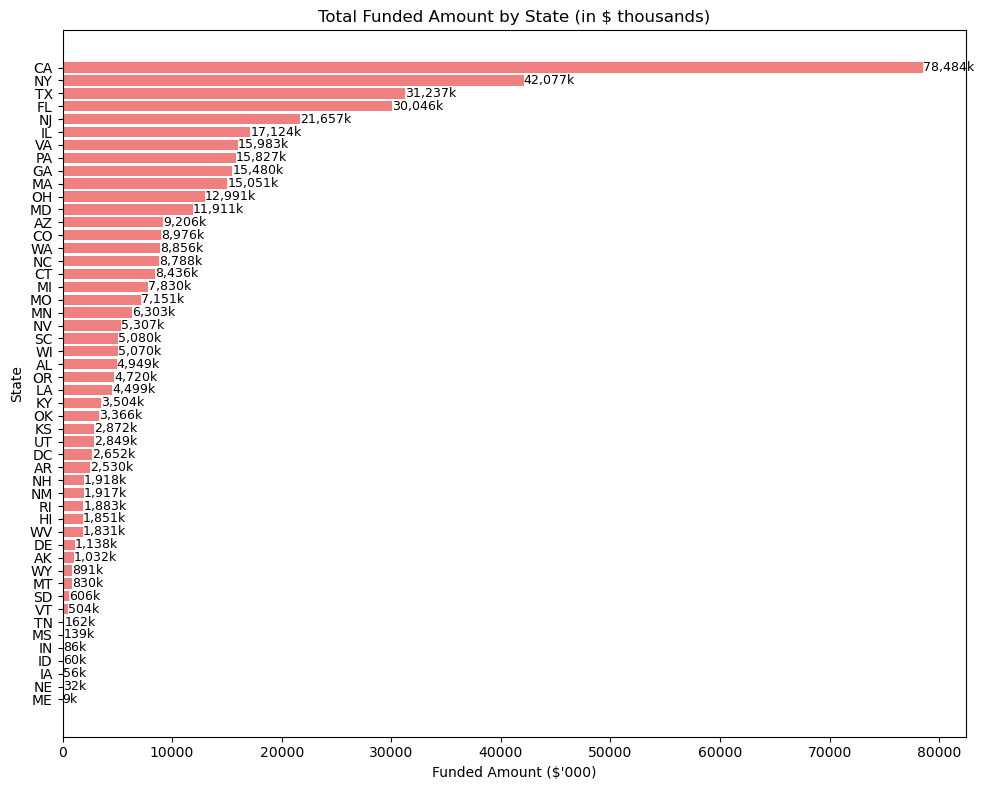

In [123]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding/1000

plt.figure(figsize=(10, 8))
bars= plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}k', va='center', fontsize=9)
    
plt.title('Total Funded Amount by State (in $ thousands)')
plt.xlabel('Funded Amount ($\'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Regional Analysis by State for Total Funds Received (Bar Chart)

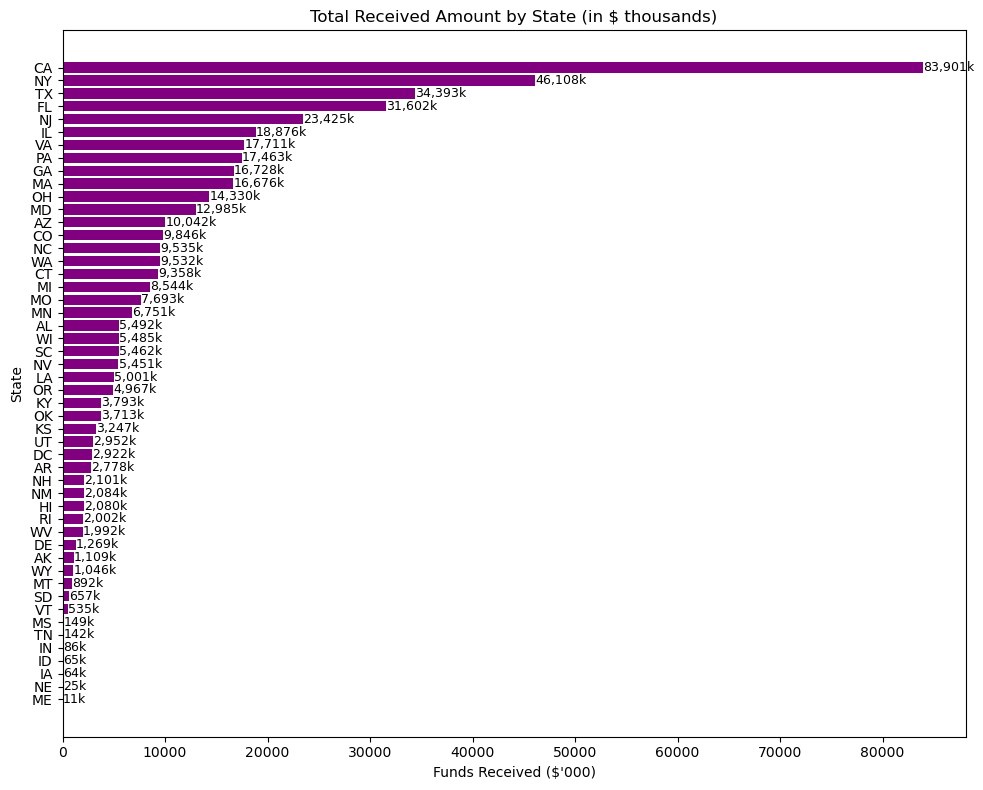

In [125]:
state_received = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_received_thousands = state_received/1000

plt.figure(figsize=(10, 8))
bars= plt.barh(state_received_thousands.index, state_received_thousands.values, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}k', va='center', fontsize=9)
    
plt.title('Total Received Amount by State (in $ thousands)')
plt.xlabel('Funds Received ($\'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Loan Term Analysis by Total Funded Amount (donut)

<function matplotlib.pyplot.show(close=None, block=None)>

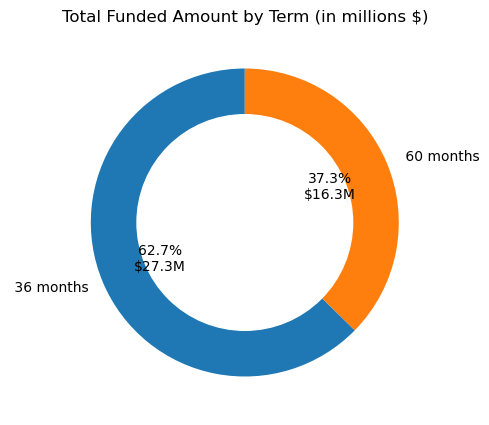

In [144]:
term_funding_millions = df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/1000:.1f}M",
    startangle=90,
    wedgeprops={'width':0.4}
)
circle = Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(circle)
plt.title("Total Funded Amount by Term (in millions $)")
plt.show

### Loan Term Analysis by Total Funds Received (donut)

<function matplotlib.pyplot.show(close=None, block=None)>

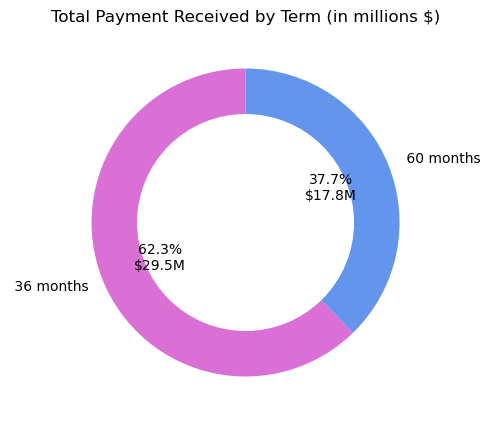

In [165]:
term_payment_millions = df.groupby('term')['total_payment'].sum()/1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_payment_millions,
    colors=['orchid', 'cornflowerblue'],
    labels=term_payment_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_payment_millions)/1000:.1f}M",
    startangle=90,
    wedgeprops={'width':0.4}
)
circle = Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(circle)
plt.title("Total Payment Received by Term (in millions $)")
plt.show

### Loan Term Analysis by Number of Applications (donut)

<function matplotlib.pyplot.show(close=None, block=None)>

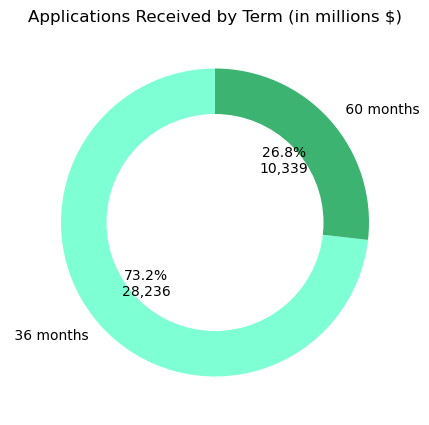

In [201]:
term_application = df.groupby('term')['id'].count()

plt.figure(figsize=(5, 5))
plt.pie(
    term_application,
    colors=['aquamarine', 'mediumseagreen'],
    labels=term_application.index,
    autopct=lambda p: f"{p:.1f}%\n{int(p*sum(term_application)/100):,}",
    #autopct=lambda p: f"{p:.1f}%\n{(term_application): ,.1f}",
    startangle=90,
    wedgeprops={'width':0.4}
)
circle = Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(circle)
plt.title("Applications Received by Term (in millions $)")
plt.show

### Employee Lenght Analysis by Total Funded Amount

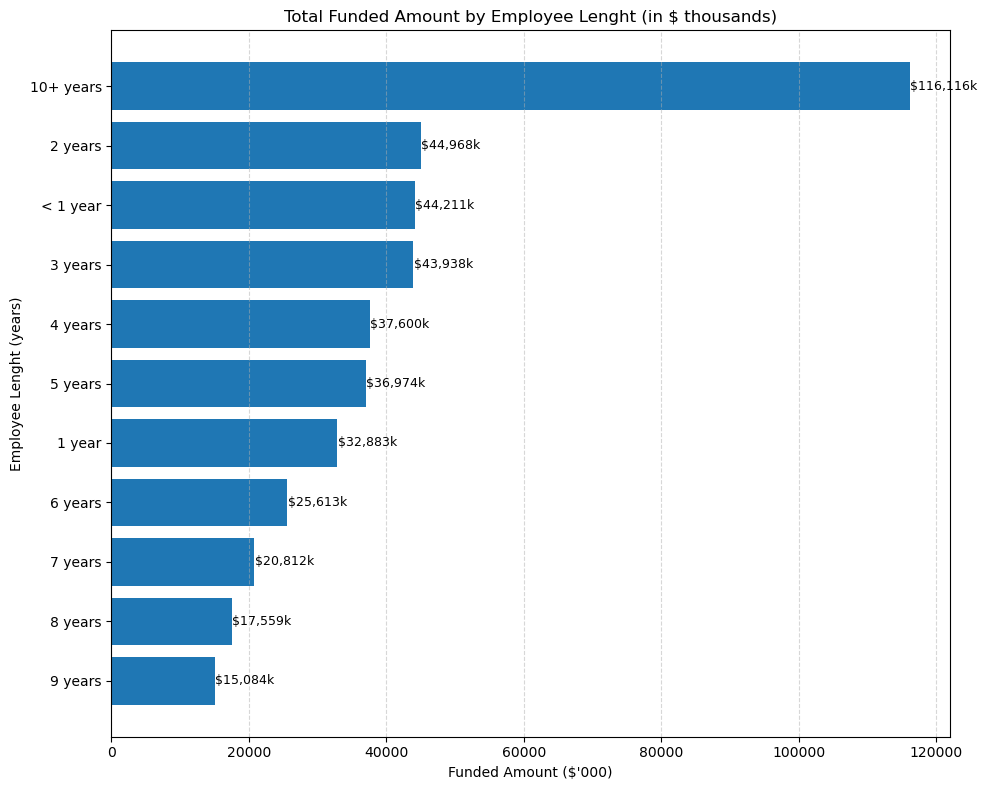

In [191]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()
emp_funding_thousands = emp_funding/1000

plt.figure(figsize=(10, 8))
bars= plt.barh(emp_funding_thousands.index, emp_funding_thousands.values)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
            f'${width:,.0f}k', va='center', fontsize=9)
    
plt.title('Total Funded Amount by Employee Lenght (in $ thousands)')
plt.xlabel('Funded Amount ($\'000)')
plt.ylabel('Employee Lenght (years)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Loan Purpose Analysis by Total Funded Amount

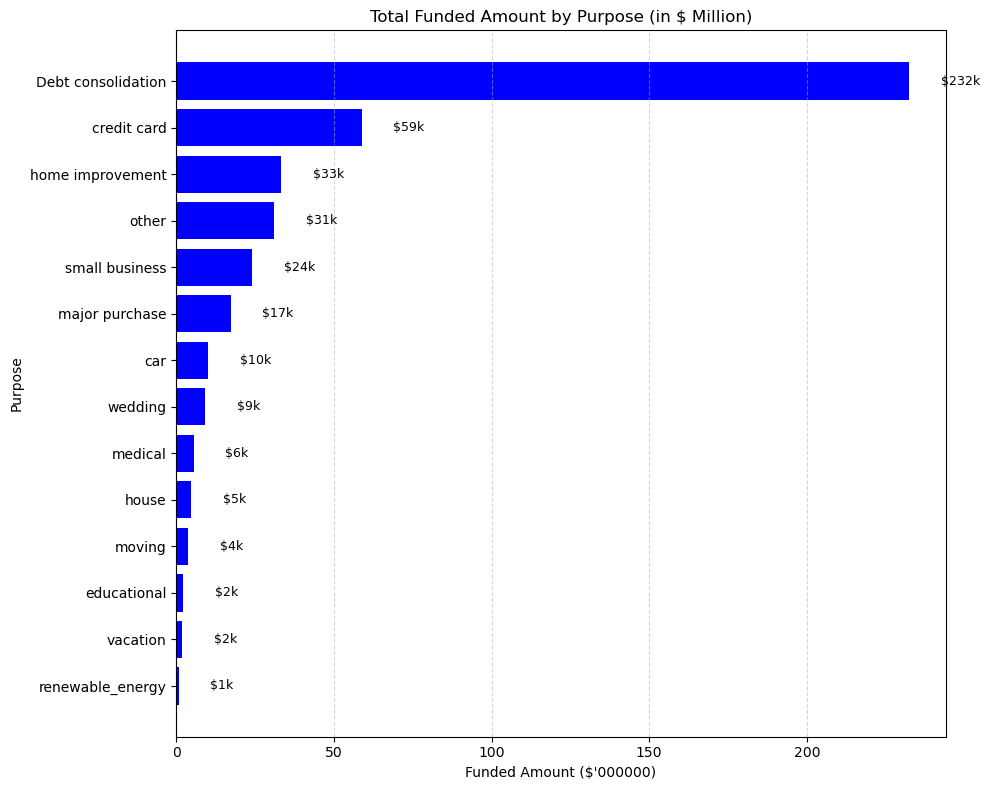

In [198]:
loan_purpose = df.groupby('purpose')['loan_amount'].sum().sort_values()
loan_purpose_million = loan_purpose/1000000

plt.figure(figsize=(10, 8))
bars= plt.barh(loan_purpose_million.index, loan_purpose_million.values, color='blue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
            f'${width:,.0f}M', va='center', fontsize=9)
    
plt.title('Total Funded Amount by Purpose (in $ Million)')
plt.xlabel('Funded Amount ($\'000000)')
plt.ylabel('Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Home Ownership Analysis by Total Funded Amount (Tree)

In [234]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['home_funding_million'] = home_funding['loan_amount']/1000000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='home_funding_million',
    color='home_funding_million',
    color_continuous_scale='greens',
    title='Total Funded Amount by Home Ownership'

)
fig.show()

### Home Ownership Analysis by Total Funded Amount (bar)

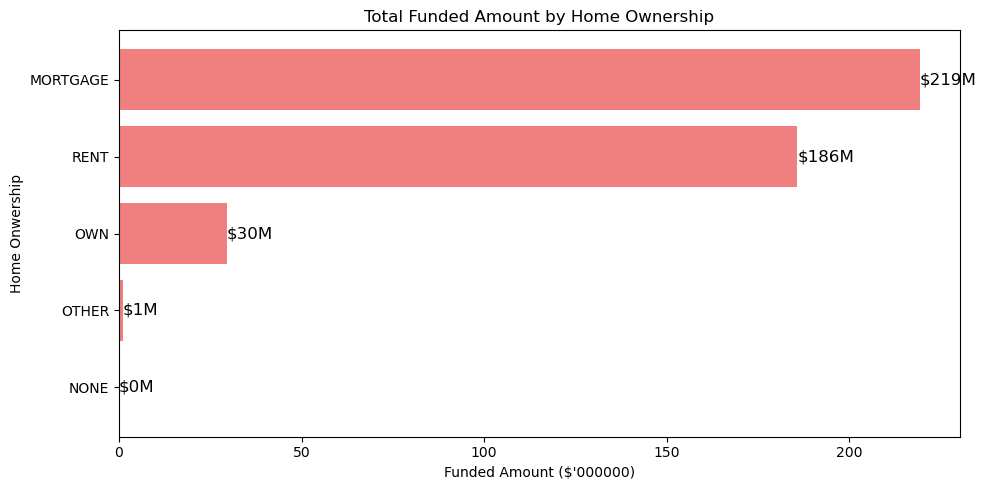

In [244]:
home_funding1 = df.groupby('home_ownership')['loan_amount'].sum().sort_values(ascending=True)/1000000

plt.figure(figsize=(10, 5))
bars= plt.barh(home_funding1.index, home_funding1.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0, bar.get_y() + bar.get_height()/2,
            f'${width:,.0f}M', va='center', fontsize=12)
    
plt.title('Total Funded Amount by Home Ownership')
plt.xlabel('Funded Amount ($\'000000)')
plt.ylabel('Home Onwership')
plt.tight_layout()
plt.show()
